$ M $ is a $4 \times 4$ matrix,$ \begin{pmatrix}
 P & 0 & 0 & 0 \\
 I & 1-(R+D2) & C & 0 \\
 0 & R & 1-(C+D3) & 0 \\
  D1 & D2 & D3 & 0\\
  \end{pmatrix}$, that describes our model when multiplied with the model's start state, 
 $ \begin{pmatrix}
N \\
 C \\
 R \\
  D\\
  \end{pmatrix}$.
  
 $N =$ "Not Cancer"- The number of people in a given year who do not have a diagnosed cancer.<br>
 $C =$ "Cancer"- The number of people in a given year who have a diagnosed cancer.<br>
 $R =$ "Remission"- The number of people in a given year who have a cancer that is in remission. For our model we have defined this as surviving for more than 5 years after the diagnosis of the cancer.<br>
 $D =$ "Dead"- The number of people who have died from all causes in the previous year.<br>

Matrix multiplication means that each row defines the next vector e.g.$Row 1$,N, Row 2,C... etc. Each element of each row corresponds to the previous generation vector's elements e.g. $m_1 n_1 \rightarrow N$, $m_1 n_2 \rightarrow C$, $m_1 n_3 \rightarrow R$ and $m_1 n_4 \rightarrow D$. <br>
<b>Row 1</b><br>
$ \begin{pmatrix}
 P-I & 0 & 0 & 0 \\
 \end{pmatrix}$<br>
<b>Row 2</b><br>
$ \begin{pmatrix}
 I & 1-(R+D2) & C & 0 \\
 \end{pmatrix}$<br>
<b>Row 3</b><br>
$ \begin{pmatrix}
 0 & R & 1-(C+D3) & 0 \\
 \end{pmatrix}$<br>
<b>Row 4</b><br>
$ \begin{pmatrix}
 D1 & D2 & D3 & 0 \\
 \end{pmatrix}$<br>

$M$ can also be viewed as describing a graph of the relationship between each group with the magnitude of each element being the weighting of each edges. The weighting is the annual change per individual member of the population.


## Explanation of sources for model parameters

### Key
NC= "Not Cancer", i.e. The population who do not have or have not had cancer.<br>
C= "Cancer" i.e. The population who have active cancer or cancer that is not classed as in remission.<br>
R= "Remission" i.e. The population who have had cancer but the cancer is in remission.<br>
D= "Dead" i.e. The number of deaths in the year period.<br>

### Cancer Incidence, Remission and Recurrence

<b>NCCancerI = 860.5/100000 newly recorded cancers per year</b> Annual all cause cancer incidence rate.
From <a href = "https://files.digital.nhs.uk/DF/6C15F5/Incidence_reference_table_final.ods"> NHS digital </a> with 
all cause deaths, age adjusted rates selected and averaged from male and female rates.

<b>CRemission = 0.09 :Annual all cause cancer remission rate.</b> This coefficient was estimated based on the 5 year survival rate from this 2012-2017 <a href = "https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/datasets/cancerregistrationstatisticscancerregistrationstatisticsengland">ONS data</a>. The various cancers survival rates were weighted by their relative frequency to give a weighted average of 0.451. This was divided by five to give the average annual chance of going into remission, <b> assuming <b/> a linear relationship.<br>

<b>RRecurrence = 0.07 :Annual all cause cancer recurrence rate.</b> This coefficient was estimated at 0.07 based on the remission rate of 0.09 and the <b>assumption</b> that this group is roughly constant or growing so this coefficient would match the inflow with the outflow.

### Population growth
<b>NCPopGrowth = 1.0055</b> <br>Population growth factor used instead of birth rate to take into account immigration etc- reference: <a href ="https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/bulletins/annualmidyearpopulationestimates/mid2019estimates"> ONS population 2019</a>.
<a href ="https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationprojections/methodologies/nationalpopulationprojectionsfertilityassumptions2020basedinterim"> ONS fertility</a> used initially however does not take into account immigration so population growth figure used.

Whilst the populations with active cancer and cancer in remission are not negligible in size we did not consider it likely to contribute to an overall growth in the population e.g. through giving birth. The corresponding coefficients for the NC row were therefore set at zero:

<b>CBirth = 0</b> Annual fertility rate for those with active cancer. Assume negligible.<br>
<b>RBirth = 0</b> Annual fertility rate for those with cancer in remission. Assume negligible.

### Death rates
No authoritative source was found with the closest reliable measure being the <a href ="https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/adhocs/12735annualdeathsandmortalityrates1938to2020provisional">ONS figures for England and Wales 1838-2020</a> giving combined rates. The values for 2018-2020 were 965.4, 925.0 & 1,043.5. This averages to 978.0 for the <b>total</b> death rate.

<b>NCDeath = 978/100000</b> #General population death rate.

<b>Cancer death rates</b>
    https://www.cancerresearchuk.org/health-professional/cancer-statistics/mortality/all-cancers-combined#heading-Zero
    137,243 cancer deaths per year 2017-19. Age adjusted mortality rate given however for whole population, not cancer population. This population for our model's purposes averages as (432000+449399+453741)/3 for 2017-2019. The cancer population's death rate is therefore 137243/((432000+449399+453741)/3), 0.308 to 3 decimal places.
    
<a href="https://www.cancerresearchuk.org/health-professional/cancer-statistics/mortality/all-cancers-combined#heading-Zero"> Cancer Research UK data</a> for England 2017-2019 was used for the additional death rate due to cancer and <b>assumed</b> to be constant. The value of 260/100,000 deaths per year was added to the UK average rate of 978, giving 1238/100,000 deaths per year.

<b>CDeath = 1238/100000</b> #Cancer population death rate.
<b>Remission death rate</b>
The death rate for those in remission was not available. An <a href="https://pubmed.ncbi.nlm.nih.gov/30905274/">italian study</a> looking at long term survivors (1994-2014 found a relative risk of 1.11 for colorectal, 1.16 for breast, and 2.17 and 2.12 for male and femle lung cancer survivors was considered however due to the different population an <b>estimate</b> was made, averating the general population's rate with that of active cancer patients. This was judged to be more reflective of England's population. (<br>
<b>RDeath = ((1238+978)/2)/100000</b> 
    
#Remission population death rate.

# Historic figures.
 
Population:<br>
<a href="https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/timeseries/enpop/pop"> ONS </a> and the <a href="https://census.gov.uk/census-2021-results/phase-one-first-results"> 2021 England & Wales Census </a>.
Death rates:<br>
2010-2020<a href="https://www.ons.gov.uk/aboutus/transparencyandgovernance/freedomofinformationfoi/totaldeathsintheuk2010to2020"> ONS </a>
Cancer population:<br>
    
Cancer deaths 2010-2020:<br>
    <a href="https://www.ons.gov.uk/aboutus/transparencyandgovernance/freedomofinformationfoi/totaldeathsanddeathsfromcancerandinfluenza2010to2020"> ONS </a>
    
<b> Remission </b><br>
This data was not easily accessible however the value for the prevalence of cancer in 2015 was found on the <a href="https://ukhsa.blog.gov.uk/2018/01/05/understanding-the-current-cancer-population-in-england/">UK HSA website</a> and used for all years. That year's cancer incidence was subtracted. 
    
# 2018
Cancer incidence: <a href= "https://www.gov.uk/government/statistics/cancer-registration-statistics-cancer-mortality-in-england-2018/cancer-registration-statistics-cancer-mortality-in-england-2018"> gov.uk </a>.

# 2019

Cancer2019 = 453741 <a href=
"https://digital.nhs.uk/data-and-information/publications/statistical/cancer-registration-statistics/england-2019"> NHS Digital</a><a href="https://files.digital.nhs.uk/34/A234B3/Mortality_reference_table_final.ods"> cancer deaths</a>.

Incidence2019 = 
<a href="https://files.digital.nhs.uk/DF/6C15F5/Incidence_reference_table_final.ods">NHS digital 2019 Incidence</a>.

Deaths2019 = 100000

# 2020

<a href="https://digital.nhs.uk/data-and-information/publications/statistical/cancer-registration-statistics/england-2020">NHS Digital Cancer 2020</a>

Population2020 = 56550000 <a href="https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/bulletins/annualmidyearpopulationestimates/latest">ONS</a>

Cancer2020 = 100000
https://files.digital.nhs.uk/70/A16CA2/Cancer_Registrations_final.ods

Deaths2020 = 100000
https://files.digital.nhs.uk/4C/ADC41A/Cancer_Mortality_final.ods
# 2021
Deaths 2021 based on England & Wales data and adjusted to england by multiplying by the ratio of the English:Welsh populations.


      0           1       2          3              4               5   \
0   Year  Not Cancer  Cancer  Remission  Annual Deaths  Alt Not Cancer   
1   2010    50842500  359157    1440843         461017        50842500   
2   2011    51220359  510081    1328492         489424        53269173   
3   2012    51601026  515121    1341207         514169        55811670   
4   2013    51984523  519115    1354146         518943        58475518   
5   2014    52370869  523098    1366576         523445        61266510   
6   2015    52760087  527086    1378612         527848        64190714   
7   2016    53152198  531082    1390351         532177        67254487   
8   2017    53547223  535092    1401870         536455        70464492   
9   2018    53945183  539119    1413232         540699        73827709   
10  2019    54346102  543166    1424484         544922        77351449   
11  2020    54750000  547234    1435666         549134        81043374   
12  2021    55156899  551326    144680

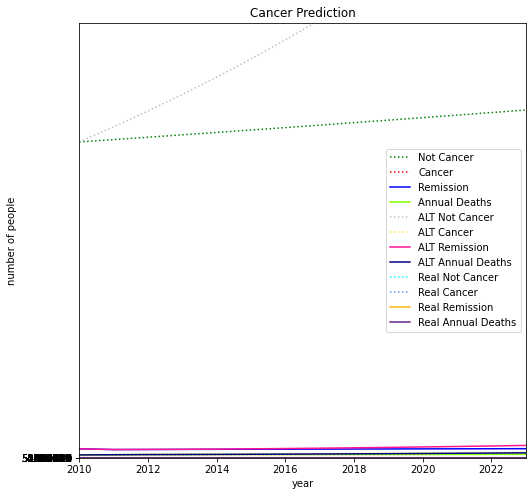

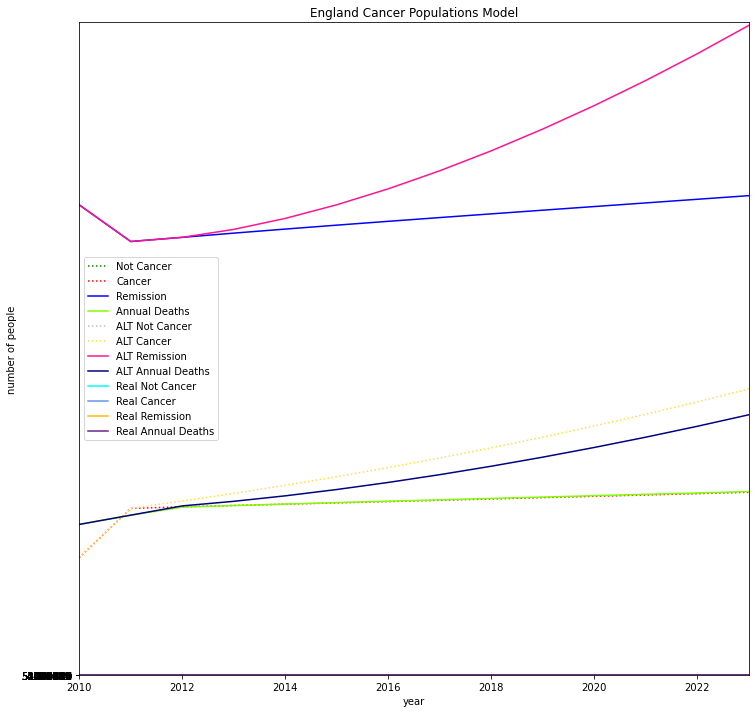

In [188]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#How many years do you want to run the model for? (from 2010)
iterations = 21

#Historic populations

#2010

Cancer2010 = 359157
Remission2010 = 1800000-Cancer2010
Deaths2010 = 461017
Population2010 = 52642500-(Cancer2010+Remission2010)

#2011
 
Cancer2011 = 360619
Remission2011 = 1800000-Cancer2011
Deaths2011 = 452862
Population2011 = 53107200-(Cancer2011+Remission2011)

#2012

Cancer2012 = 360861
Remission2012 = 1800000-Cancer2012
Deaths2012 = 466779
Population2012 = 53493700-(Cancer2012+Remission2012)

#2013

Cancer2013 = 411883
Remission2013 = 1800000-Cancer2013
Deaths2013 = 473552
Population2013 = 53865800-(Cancer2013+Remission2013)

#2014

Cancer2014 = 426684
Remission2014 = 1800000-Cancer2014
Deaths2014 = 468875
Population2014 = 54316600-(Cancer2014+Remission2014)

#2015
 
Cancer2015 = 421912
Remission2015 = 1800000-Cancer2015
Deaths2015 = 495309
Population2015 = 54786300-(Cancer2015+Remission2015)

#2016

Cancer2016 = 433549
Remission2016 = 1800000-Cancer2016
Deaths2016 = 490791
Population2016 = 55268100-(Cancer2016+Remission2016)

#2017 

Cancer2017 = 432000
Remission2017 = 1800000-Cancer2017
Deaths2017 = 498882
Population2017 = 55619400-(Cancer2017+Remission2017)

#2018

Cancer2018 = 449399
Remission2018 = 1800000-Cancer2018
Deaths2018 = 505859
Population2018 = 55977200-(Cancer2018+Remission2018)

#2019

Cancer2019 = 453741
Remission2019 = 1800000-Cancer2019
Deaths2019 = 505859
Population2019 = 56287000-(Cancer2019+Remission2019)

#2020

Cancer2020 = 389348
Remission2020 = 1800000-Cancer2020
Deaths2020 = 575723
Population2020 = 56550000-(Cancer2020+Remission2020)

#2021

Cancer2021 = 450000
Remission2021 = 1800000-Cancer2021
Deaths2021 = 555215
Population2021 = 56550000-(Cancer2021+Remission2021)

#Load historic data into python matrix
Historic = [[2010,Population2010,Cancer2010,Remission2010,Deaths2010],
            [2011,Population2011,Cancer2011,Remission2011,Deaths2011],
            [2012,Population2012,Cancer2012,Remission2012,Deaths2012],
            [2013,Population2013,Cancer2013,Remission2013,Deaths2013],
            [2014,Population2014,Cancer2014,Remission2014,Deaths2014],
            [2015,Population2015,Cancer2015,Remission2015,Deaths2015],
            [2016,Population2016,Cancer2016,Remission2016,Deaths2016],
            [2017,Population2017,Cancer2017,Remission2017,Deaths2017],
            [2018,Population2018,Cancer2018,Remission2018,Deaths2018],
            [2019,Population2019,Cancer2019,Remission2019,Deaths2019],
            [2020,Population2020,Cancer2020,Remission2020,Deaths2020],
            [2021,Population2021,Cancer2021,Remission2021,Deaths2021]]

#Start state 
output = [["Year","Not Cancer","Cancer","Remission","Annual Deaths","Alt Not Cancer","Alt Cancer","Alt Remission","Alt Annual Deaths","Real Not Cancer","Real Cancer","Real Remission","Real Annual Deaths"],
          [2010,Population2010,Cancer2010,Remission2010,Deaths2010,Population2010,Cancer2010,Remission2010,Deaths2010,Population2010,Cancer2010,Remission2010,Deaths2010]]

#Transfer starting year into vector for multiplication
GroupsVector = np.array([[output[1][1]],
                         [output[1][2]],
                         [output[1][3]],
                         [output[1][4]]])
altGroupsVector = np.array([[output[1][1]],
                         [output[1][2]],
                         [output[1][3]],
                         [output[1][4]]])


altGrouptVector = np.array([[],[],[],[],[],[],[]])

# Coefficients
NCPopGrowth = 1.007431956   # Annual population growth rate adapted from real world historic data.
NCCancerI = 860.5/100000 # Annual all cause cancer incidence rate.
CRemission = 0.65 #Annual all cause cancer remission rate.
RRecurrence = 0.04 #Annual all cause cancer recurrence rate.
CBirth = 0 #Annual fertility rate for those with active cancer. Assume negligible.
RBirth = 0 #Annual fertility rate for those with cancer in remission. Assume negligible.
CDeath = 137243/((432000+449399+453741)/3) #Cancer population death rate.
NCDeath = (978-800)/100000 #General population death rate. - adjustment for the removal of the cancer population
RDeath = 0.2 #Remission population death rate.

# Alternate Coefficients
AltNCPopGrowth = NCPopGrowth*1.04 # Annual population growth rate.
AltNCCancerI = NCCancerI # Annual all cause cancer incidence rate.
AltCRemission = CRemission #Annual all cause cancer remission rate.
AltRRecurrence = RRecurrence #Annual all cause cancer recurrence rate.
AltCBirth = CBirth #Annual fertility rate for those with active cancer. Assume negligible.
AltRBirth = RBirth #Annual fertility rate for those with cancer in remission. Assume negligible.
AltNCDeath = NCDeath #General population death rate.
AltCDeath = CDeath #Cancer population death rate.
AltRDeath = RDeath #Remission population death rate.

#Matrix to describe the model and relationships between the four groups
annual = np.array([[NCPopGrowth,CBirth,RBirth,0],
                   [NCCancerI,1-(CRemission+CDeath),RRecurrence,0],
                   [0,CRemission,1-(RRecurrence+RDeath),0],
                   [NCDeath,CDeath,RDeath,0]])

#Matrix to describe the alternate model- what we could do differently
altAnnual = np.array([[AltNCPopGrowth,AltCBirth,AltRBirth,0],
                   [AltNCCancerI,1-(AltCRemission+AltCDeath),AltRRecurrence,0],
                   [0,AltCRemission,1-(AltRRecurrence+AltRDeath),0],
                   [AltNCDeath,AltCDeath,AltRDeath,0]])

#Iterate through different 'years' to create projections append to the start state matrix
for i in range(1,iterations):
    nextYear = np.linalg.matrix_power(annual,i) @ GroupsVector
    altNextYear = np.linalg.matrix_power(altAnnual,i) @ altGroupsVector
    output.append([output[1][0]+i,int(nextYear[0]),int(nextYear[1]),int(nextYear[2]),int(nextYear[3]),
                   int(altNextYear[0]),int(altNextYear[1]),int(altNextYear[2]),int(altNextYear[3]),""
                   ,"","",""])

for j in range (1,len(output)):
    year = output[j][0]
    for k in range(0,len(Historic)):
        if year == Historic[k][0]:
            output[j][9]=Historic[k][1]
            output[j][10]=Historic[k][2]
            output[j][11]=Historic[k][3]
            output[j][12]=Historic[k][4]
    
#print("Eigenvector Annual:", np.linalg.eig(annual))
#print("Eigenvector Alternate Annual:",np.linalg.eig(altAnnual))
    
output= pd.DataFrame(output)
    
print(output)

NC = []
for i in range(1,15):
    NC.append(output[1][i])
C = []
for i in range(1,15):
    C.append(output[2][i])
REM = []
for i in range(1,15):
    REM.append(output[3][i])
D = []
for i in range(1,15):
    D.append(output[4][i])
ALTNC = []
for i in range(1,15):
    ALTNC.append(output[5][i])
ALTC = []
for i in range(1,15):
    ALTC.append(output[6][i])
ALTREM = []
for i in range(1,15):
    ALTREM.append(output[7][i])
ALTD = []
for i in range(1,15):
    ALTD.append(output[8][i])
RNC = []
for i in range(1,15):
    RNC.append(output[9][i])
RC = []
for i in range(1,15):
    RC.append(output[10][i])
RREM = []
for i in range(1,15):
    RREM.append(output[11][i])
RD = []
for i in range(1,15):
    RD.append(output[12][i])


plt.figure(figsize=(8,8))
plt.axis([2010, 2023, 0, 70000000])
x = np.linspace(2010,2023,14)

plt.plot(x, NC, color='g', linestyle=':', label='Not Cancer')
plt.plot(x, C, color='red', linestyle=':', label='Cancer') 
plt.plot(x, REM, color='blue', label='Remission')
plt.plot(x, D, color='chartreuse', label='Annual Deaths')
plt.plot(x, ALTNC, color='0.75', linestyle=':', label='ALT Not Cancer')
plt.plot(x, ALTC, color='#FFDD44', linestyle=':', label='ALT Cancer') 
plt.plot(x, ALTREM, color='#FF1493', label='ALT Remission')
plt.plot(x, ALTD, color='#000080', label='ALT Annual Deaths')
plt.plot(x, RNC, color='#00FFFF', linestyle=':', label='Real Not Cancer')
plt.plot(x, RC, color='#6495ED', linestyle=':', label='Real Cancer') 
plt.plot(x, RREM, color='#FFB90F', label='Real Remission')
plt.plot(x, RD, color='#68228B', label='Real Annual Deaths')
plt.title("Cancer Prediction")
plt.xlabel("year")
plt.ylabel("number of people");
plt.legend();

plt.figure(figsize=(12,12))
plt.axis([2010, 2023, 0, 2000000])
x = np.linspace(2010,2023,14)
y = np.linspace(2010,2023,20000000)
plt.plot(x, NC, color='g', linestyle=':', label='Not Cancer')
plt.plot(x, C, color='red', linestyle=':', label='Cancer') 
plt.plot(x, REM, color='blue', label='Remission')
plt.plot(x, D, color='chartreuse', label='Annual Deaths')
plt.plot(x, ALTNC, color='0.75', linestyle=':', label='ALT Not Cancer')
plt.plot(x, ALTC, color='#FFDD44', linestyle=':', label='ALT Cancer') 
plt.plot(x, ALTREM, color='#FF1493', label='ALT Remission')
plt.plot(x, ALTD, color='#000080', label='ALT Annual Deaths')
plt.plot(x, RNC, color='#00FFFF', label='Real Not Cancer')
plt.plot(x, RC, color='#6495ED', label='Real Cancer') 
plt.plot(x, RREM, color='#FFB90F', label='Real Remission')
plt.plot(x, RD, color='#68228B', label='Real Annual Deaths')
plt.title("England Cancer Populations Model")
plt.xlabel("year")
plt.ylabel("number of people");
plt.legend();

$M^yV_n=V_{n+y}$

$ \begin{pmatrix}
 P & 0 & 0 & 0 \\
 I & 1-(R+D2) & C & 0 \\
 0 & R & 1-(C+D3) & 0 \\
  D1 & D2 & D3 & 0\\
  \end{pmatrix}^y$
 $ \begin{pmatrix}
N_n \\
 C_n \\
 R_n \\
  D_n\\
  \end{pmatrix}$
  $=$
  $ \begin{pmatrix}
N_{n+y} \\
 C_{n+y} \\
 R_{n+y} \\
  D_{n+y}\\
  \end{pmatrix}$
 